### Summary Stats on the rating dataset
#### Overall
- total number of records
- rating range
- rating histogram
- average user rating 
- average item rating 
  
#### Item-base
- total number of items in 
- item rating histogram
- average user rating
- number of user interaction
- max rating
- min rating
#### User-base 
- user id
- user rating histogram
- number of items subscribed
- mean user rating
  

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 


In [3]:
data = pd.read_csv('../data/movielens.csv')
data.head()

,UserId,MovieId,Rating,Timestamp,Title,datetime
0,196,242,3.0,881250949,Kolya (1996),1997-12-04 21:55:49
1,63,242,3.0,875747190,Kolya (1996),1997-10-02 05:06:30
2,226,242,5.0,883888671,Kolya (1996),1998-01-04 10:37:51
3,154,242,3.0,879138235,Kolya (1996),1997-11-10 11:03:55
4,306,242,5.0,876503793,Kolya (1996),1997-10-10 23:16:33


---
Overall stats

In [4]:
total_number_of_records = data.shape[0]
rating_range = (data['Rating'].min(), data['Rating'].max())
average_user_rating = data.loc[:, ['UserId', 'Rating']].groupby('UserId')['Rating'].mean().mean()
average_item_rating = data.loc[:, ['MovieId', 'Rating']].groupby('MovieId')['Rating'].mean().mean()

In [5]:
overall_dict = {
    'total number of records': total_number_of_records,
    'rating range': rating_range,
    'average user rating': average_user_rating,
    'average item rating': average_item_rating,
    'rating hist': {'data': data.loc[:, ['UserId', 'Rating']].groupby('Rating')['UserId'].count().to_dict(),
                    'low': data['Rating'].quantile(0),
                    'q1': data['Rating'].quantile(0.25),
                    'q2': data['Rating'].quantile(0.5),
                    'q3': data['Rating'].quantile(0.75),
                    'high': data['Rating'].quantile(1)
    },
}
overall_dict

{'total number of records': 100000,
 'ranting range': (1.0, 5.0),
 'average user rating': 3.588191107184803,
 'average item rating': 3.0760445083251824,
 'rating hist': {'data': {1.0: 6110,
   2.0: 11370,
   3.0: 27145,
   4.0: 34174,
   5.0: 21201},
  'low': 1.0,
  'q1': 3.0,
  'q2': 4.0,
  'q3': 4.0,
  'high': 5.0}}

In [10]:
rating_hist = data.loc[:, ['UserId', 'Rating']].groupby('Rating')['UserId'].count().to_dict()


{1.0: 6110, 2.0: 11370, 3.0: 27145, 4.0: 34174, 5.0: 21201}

---
Item stats

In [7]:
nuniq_items = data['MovieId'].nunique()
item_user_df = data.copy().loc[:, ['MovieId', 'UserId']].groupby('MovieId').count().reset_index()
item_rating_df = data.copy().loc[:, ['MovieId', 'Rating']].groupby('MovieId').mean().astype(int).reset_index()

In [9]:
item_user_df

,MovieId,UserId
0,1,452
1,2,131
2,3,90
3,4,209
4,5,86
...,...,...
1677,1678,1
1678,1679,1
1679,1680,1
1680,1681,1


In [28]:
q1 = item_user_df['UserId'].quantile(0.25)
print(q1)
total_items = item_user_df.shape[0]
active_items = (item_user_df['UserId']>q1).astype(int).sum()
print(active_items)

6.0
1259


In [37]:
quantile_points = np.arange(0, 1, 0.05)
f1 = lambda x: item_user_df['UserId'].quantile(x).values
qs = f1(quantile_points)
print(qs)
active_items = np.array([(item_user_df['UserId']>x).astype(int).sum() for x in qs])
print(active_items)

[  1.     1.     2.     3.     5.     6.     9.    12.    16.    21.
  27.    34.    43.    51.65  65.    80.   100.   127.85 169.   229.85]
[1541 1541 1473 1413 1298 1259 1152 1071  991  913  827  750  666  589
  499  416  334  253  167   85]


In [39]:
import plotly.express as px 

fig = px.line(x=quantile_points, y=active_items, labels=active_items ,markers=True)
fig.show()

In [12]:
item_dict = {
    'total number of items': nuniq_items,
    'Item subscribe histogram': {
        'data': item_user_df.groupby('UserId')['MovieId'].count().to_dict(),
        'low': item_user_df['UserId'].quantile(0),
        'q1': item_user_df['UserId'].quantile(0.25),
        'q2': item_user_df['UserId'].quantile(0.5),
        'q3': item_user_df['UserId'].quantile(0.75),
        'high': item_user_df['UserId'].quantile(1)
    },
    'Item rating histogram': {
        'data': item_rating_df.groupby('Rating')['MovieId'].count().to_dict(),
        'low': item_rating_df['Rating'].quantile(0),
        'q1': item_rating_df['Rating'].quantile(0.25),
        'q2': item_rating_df['Rating'].quantile(0.5),
        'q3': item_rating_df['Rating'].quantile(0.75),
        'high': item_rating_df['Rating'].quantile(1)
    },
    'active item quantile plot': {
        'quantile points': np.arange(0, 1, 0.05),
        'relative user count': qs,
        'number of active items': active_items
    }
}
# item_dict

---
User Stats

In [15]:
nuniq_users = data['UserId'].nunique()
user_item_df = data.copy().loc[:, ['UserId', 'MovieId']].groupby('UserId')['MovieId'].count().reset_index()
user_rating_df = data.copy().loc[:, ['UserId', 'Rating']].groupby('UserId')['Rating'].mean().astype(int).reset_index()

In [17]:
user_dict = {
    'total number of user': nuniq_users,
    'User engagement histogram': {
        'data': user_item_df.groupby('MovieId')['UserId'].count().to_dict(),
        'low': user_item_df['MovieId'].quantile(0),
        'q1': user_item_df['MovieId'].quantile(0.25),
        'q2': user_item_df['MovieId'].quantile(0.5),
        'q3': user_item_df['MovieId'].quantile(0.75),
        'high': user_item_df['MovieId'].quantile(1)
    },
    'User rating histogram': {
        'data': user_rating_df.groupby('Rating')['UserId'].count().to_dict(),
        'low': user_rating_df['Rating'].quantile(0),
        'q1': user_rating_df['Rating'].quantile(0.25),
        'q2': user_rating_df['Rating'].quantile(0.5),
        'q3': user_rating_df['Rating'].quantile(0.75),
        'high': user_rating_df['Rating'].quantile(1)
    }
}

---
Distribution Approximation

In [1]:
file_path = '../data/movielens.csv'

In [2]:
import pandas as pd 
import os 
import numpy as np

In [3]:
file_size = os.stat(file_path)
print("Size : ", round(file_size.st_size/1024**2, 3), " MB")

Size :  6.299  MB


In [4]:
file_size

os.stat_result(st_mode=33188, st_ino=13850925, st_dev=16777221, st_nlink=1, st_uid=501, st_gid=20, st_size=6604556, st_atime=1653314569, st_mtime=1653302629, st_ctime=1653302629)

In [5]:
df = pd.read_csv(file_path)

In [6]:
num_rows, num_cols = df.shape

In [7]:
flt_df = df.drop_duplicates()
new_rows, _ = flt_df.shape

In [8]:
print(num_rows, num_cols, new_rows, num_rows-new_rows)

100000 6 100000 0


In [9]:
scores = df['Rating'].values 

In [10]:
from distfit import distfit

In [17]:
dist = distfit(alpha=0.05, multtest='fdr_bh', method='discrete')

In [18]:
dist.fit_transform(scores)

[distfit] >fit..
[distfit] >transform..
[distfit] >Fit using binomial distribution..
[distfit] >[binomial] [RSS=0.0225] [n=5] [p=0.789832] [chi^2=0.00562]
[distfit] >Compute confidence interval [discrete]


{'model': {'name': 'binom',
  'distr': <scipy.stats._discrete_distns.binom_gen at 0x7fe8460c2040>,
  'model': <scipy.stats._distn_infrastructure.rv_frozen at 0x7fe8421a67f0>,
  'params': (5, 0.7898324621592565),
  'score': 0.02247238311246401,
  'chi2r': 0.005618095778116002,
  'n': 5,
  'p': 0.7898324621592565,
  'CII_min_alpha': 2.0,
  'CII_max_alpha': 5.0},
 'summary': {'scores': array([0.09890053, 0.02247238, 0.0362483 , 0.04992305, 0.06148503,
         0.07124545]),
  'Xdata': array([0, 1, 2, 3, 4, 5]),
  'hist': array([    0,  6110, 11370, 27145, 34174, 21201]),
  'Ydata': array([0.     , 0.0611 , 0.1137 , 0.27145, 0.34174, 0.21201]),
  'nvals': array([4, 5, 6, 7, 8, 9])},
 'histdata': (array([0.76375 , 0.      , 0.      , 0.      , 0.      , 0.      ,
         0.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
         1.42125 , 0.      , 0.      , 0.      , 0.      , 0.      ,
         0.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
         0.      , 3.393

In [19]:
dist.model

{'name': 'binom',
 'distr': <scipy.stats._discrete_distns.binom_gen at 0x7fe8460c2040>,
 'model': <scipy.stats._distn_infrastructure.rv_frozen at 0x7fe8421a67f0>,
 'params': (5, 0.7898324621592565),
 'score': 0.02247238311246401,
 'chi2r': 0.005618095778116002,
 'n': 5,
 'p': 0.7898324621592565,
 'CII_min_alpha': 2.0,
 'CII_max_alpha': 5.0}

[distfit] >plot..


(<Figure size 720x576 with 2 Axes>,
 array([<AxesSubplot:title={'center':'\nbinom\nn=5, p=0.789832'}, xlabel='k', ylabel='Counts'>,
        <AxesSubplot:xlabel='n', ylabel='RSS'>], dtype=object))

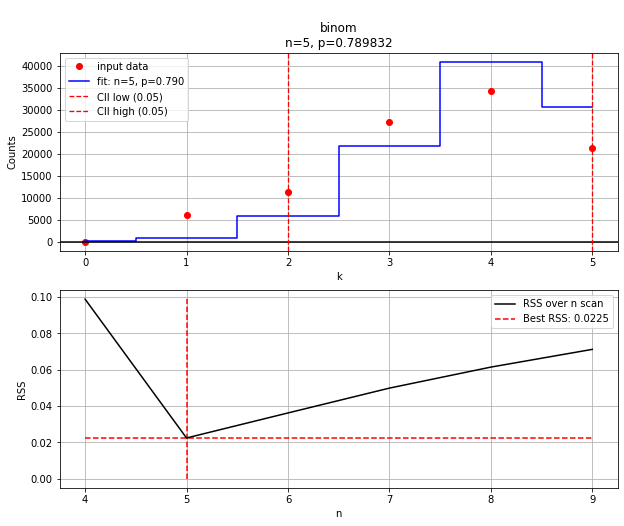

In [20]:
dist.plot()

In [37]:
from pygam import PoissonGAM
from pygam.datasets import faithful
import matplotlib.pyplot as plt

In [28]:
X_y = df.loc[:, ['UserId', 'Rating']].groupby('Rating')['UserId'].count().reset_index().to_numpy().astype(np.int32)
X_y

array([[    1,  6110],
       [    2, 11370],
       [    3, 27145],
       [    4, 34174],
       [    5, 21201]], dtype=int32)

In [38]:
X, y = X_y[:, 0][..., np.newaxis], X_y[:, 1]
gam = PoissonGAM().gridsearch(X, y)

  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--
 36% (4 of 11) |#########                | Elapsed Time: 0:00:00 ETA:  00:00:00
 81% (9 of 11) |####################     | Elapsed Time: 0:00:00 ETA:   0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


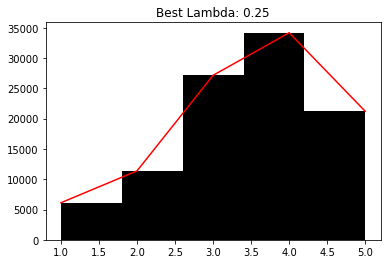

In [39]:
plt.hist(scores, bins=5, color='k');
plt.plot(X, gam.predict(X), color='r')
plt.title('Best Lambda: {0:.2f}'.format(gam.lam[0][0]));

In [ ]:
gam.statistics_

In [43]:
gam.summary()

PoissonGAM                                                                                                
=============================================== ==========================================================
Distribution:                       PoissonDist Effective DoF:                                      4.9997
Link Function:                          LogLink Log Likelihood:                                    -28.928
Number of Samples:                            5 AIC:                                               67.8554
                                                AICc:                                              25.8528
                                                UBRE:                                               4.7999
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                      1.0
Feature Function                  Lam